# Physics 404/604

## Computational Physics (Spring 2019)

## BPB-250, Mon./Wed. 1:00-2:15 pm

| Instructor | Prof. Zhaohuan Zhu                 |
| ---------- | :--------------------------------- |
| Email      | zhaohuan.zhu@unlv.edu              |
| Website    | http://www.physics.unlv.edu/~zhzhu |
| Office     | BPB 245                            |



# 1. How to represent numbers?



## 1.1 Integers:   

 [$-2^{n-1}$, $2^{n-1}$] where n is the number of bits used to store the signed integer
      
      Note that in python2 integer is either 4 bytes or 8 bytes. In python 3, integer can be any length as long as the memory allows. On the otherhand, some python libraries (e.g. numpy) donot support these very long integers. Remember only 19 digets integer

In [1]:
import numpy as np
a=np.array([2**63-1])
print(a.dtype)
print(a,bin(a[0]))
print(a+1,bin(a[0]+1))
    

int64
[9223372036854775807] 0b111111111111111111111111111111111111111111111111111111111111111
[-9223372036854775808] -0b1000000000000000000000000000000000000000000000000000000000000000


C:\Users\luojiawei\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in longlong_scalars
  """


## 1.2 Floating point numbers:

8 bytes  
One number in the memory   
ABBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC

A: sign  
B: e  
C: $b_{52-i}$
i is the bit of C; the i of the leftmost C is 1; the i of the rightmost C is 52.

\begin{equation}  
x=(-1)^{sign}(1+\sum_{i=1}^{52} b_{52-i}2^{-i})2^{e-1023}
\end{equation}

In [2]:
import random
import numpy as np
import struct

In [3]:
def fextract(num):
    return ''.join(bin(c).replace('0b', '').rjust(8, '0') for c in struct.pack('!d', num))

In [4]:
num=1.0
print("%.31f  %s"%(num,fextract(num)[0]+' '+fextract(num)[1:12]+' '+fextract(num)[12:]))

1.0000000000000000000000000000000  0 01111111111 0000000000000000000000000000000000000000000000000000


In [5]:
num=0.5
print("%.31f  %s"%(num,fextract(num)[0]+' '+fextract(num)[1:12]+' '+fextract(num)[12:]))

0.5000000000000000000000000000000  0 01111111110 0000000000000000000000000000000000000000000000000000


In [6]:
num=0.75
print("%.31f  %s"%(num,fextract(num)[0]+' '+fextract(num)[1:12]+' '+fextract(num)[12:]))

0.7500000000000000000000000000000  0 01111111110 1000000000000000000000000000000000000000000000000000


In [7]:
num=0.2
print("%.31f  %s"%(num,fextract(num)[0]+' '+fextract(num)[1:12]+' '+fextract(num)[12:]))

0.2000000000000000111022302462516  0 01111111100 1001100110011001100110011001100110011001100110011010


In [8]:
# Left association is important !!! Keep this in mind when you are dealing with round-off errors.

num=0.2+1.9-0.3
print("%.31f  %s"%(num,fextract(num)[0]+' '+fextract(num)[1:12]+' '+fextract(num)[12:]))


num=1.9+0.2-0.3
print("%.31f  %s"%(num,fextract(num)[0]+' '+fextract(num)[1:12]+' '+fextract(num)[12:]))


num=0.2-0.3+1.9
print("%.31f  %s"%(num,fextract(num)[0]+' '+fextract(num)[1:12]+' '+fextract(num)[12:]))

# A+B-C does not equal A-C+B

1.8000000000000000444089209850063  0 01111111111 1100110011001100110011001100110011001100110011001101
1.8000000000000000444089209850063  0 01111111111 1100110011001100110011001100110011001100110011001101
1.7999999999999998223643160599750  0 01111111111 1100110011001100110011001100110011001100110011001100


Range 

[-$10^{308}$, -$10^{-324}$] [$10^{-324}$,10$^{308}$]

In [9]:
num=1.e-325 #underflow sometimes is treated as 0
print("%.19e  %s"%(num,fextract(num)[0]+' '+fextract(num)[1:12]+' '+fextract(num)[12:]))

0.0000000000000000000e+00  0 00000000000 0000000000000000000000000000000000000000000000000000


In [10]:
num=1.e-323
print("%.19e  %s"%(num,fextract(num)[0]+' '+fextract(num)[1:12]+' '+fextract(num)[12:]))

9.8813129168249308835e-324  0 00000000000 0000000000000000000000000000000000000000000000000010


In [11]:
num=1.e309 #overflow generates infinity
print("%.19e  %s"%(num,fextract(num)[0]+' '+fextract(num)[1:12]+' '+fextract(num)[12:]))

inf  0 11111111111 0000000000000000000000000000000000000000000000000000


In [12]:
num=1.7976931348e308 #overflow generates infinity
print("%.19e  %s"%(num,fextract(num)[0]+' '+fextract(num)[1:12]+' '+fextract(num)[12:]))

1.7976931347999999853e+308  0 11111111110 1111111111111111111111111111111110110011110001011011


In [13]:
# Write a code to determine the overflow and underflow limit to be accurate by a factor 2
# Print out number which are 1/2^i and 2^i, eventually 1/2^i will become 0 and 2^i will become inf

under =1.
over =1.
underflow = overflow = False
for i in range(1100):
    if underflow is False:
        under = under / 2
        if fextract(under)[1:12] == '00000000000' and fextract(under)[12:]== '0000000000000000000000000000000000000000000000000001':
            print("Underflow! %.19e  %s"%(under,fextract(under)[0]+' '+fextract(under)[1:12]+' '+fextract(under)[12:]))
            underflow = True
    if overflow is False:
        over = over * 2
        if fextract(over)[1:12] == '11111111110':
            print("Overflow! %.19e  %s"%(over,fextract(over)[0]+' '+fextract(over)[1:12]+' '+fextract(over)[12:]))
            overflow = True
    if overflow and underflow: break

Overflow! 8.9884656743115795386e+307  0 11111111110 0000000000000000000000000000000000000000000000000000
Underflow! 4.9406564584124654418e-324  0 00000000000 0000000000000000000000000000000000000000000000000001


Machine Precision: 

In [14]:
num=1.0e-17
print("%.31f  %s"%(num,fextract(num)[0]+' '+fextract(num)[1:12]+' '+fextract(num)[12:]))

0.0000000000000000100000000000000  0 01111000110 0111000011101111010101000110010001101101010010010111


In [15]:
num=1.0+1.0e-17
print("%.31f  %s"%(num,fextract(num)[0]+' '+fextract(num)[1:12]+' '+fextract(num)[12:]))

1.0000000000000000000000000000000  0 01111111111 0000000000000000000000000000000000000000000000000000


In [16]:
num1 = 100.1
num2= 100.1+100.*1.0e-17
print("%.31f %.31f"%(num1,num2))

100.0999999999999943156581139191985 100.0999999999999943156581139191985


In [17]:
# determine your machine's precision
# Note definition of machine's precision is 1+epsion=1

N = 60
eps =1.0

for i in range(N):
    eps = eps/2
    print('i=%d, 1+eps=%.16f' %(i,1+eps))
    if 1+eps == 1:
        break      

i=0, 1+eps=1.5000000000000000
i=1, 1+eps=1.2500000000000000
i=2, 1+eps=1.1250000000000000
i=3, 1+eps=1.0625000000000000
i=4, 1+eps=1.0312500000000000
i=5, 1+eps=1.0156250000000000
i=6, 1+eps=1.0078125000000000
i=7, 1+eps=1.0039062500000000
i=8, 1+eps=1.0019531250000000
i=9, 1+eps=1.0009765625000000
i=10, 1+eps=1.0004882812500000
i=11, 1+eps=1.0002441406250000
i=12, 1+eps=1.0001220703125000
i=13, 1+eps=1.0000610351562500
i=14, 1+eps=1.0000305175781250
i=15, 1+eps=1.0000152587890625
i=16, 1+eps=1.0000076293945312
i=17, 1+eps=1.0000038146972656
i=18, 1+eps=1.0000019073486328
i=19, 1+eps=1.0000009536743164
i=20, 1+eps=1.0000004768371582
i=21, 1+eps=1.0000002384185791
i=22, 1+eps=1.0000001192092896
i=23, 1+eps=1.0000000596046448
i=24, 1+eps=1.0000000298023224
i=25, 1+eps=1.0000000149011612
i=26, 1+eps=1.0000000074505806
i=27, 1+eps=1.0000000037252903
i=28, 1+eps=1.0000000018626451
i=29, 1+eps=1.0000000009313226
i=30, 1+eps=1.0000000004656613
i=31, 1+eps=1.0000000002328306
i=32, 1+eps=1.0000

In [18]:
# error in operations

num1 = 0.1
num2 = 0.2
num3 = 0.3
print("%.31f %.31f %.31f %.31f"%(num1,num2, num1+num2, num3))
print(" the relative of the difference is ",abs((num1+num2)/num3-1))

0.1000000000000000055511151231258 0.2000000000000000111022302462516 0.3000000000000000444089209850063 0.2999999999999999888977697537484
 the relative of the difference is  2.220446049250313e-16


In [19]:
num1 = 0.2000000000001
num2 = 0.2
num3 = 0.0000000000001
print("%.31f %.31f %.31f %.31f"%(num1,num2, num1-num2, num3))
print(" the relative of the difference is ",abs((num1-num2)/num3-1))

0.2000000000000999866855977415980 0.2000000000000000111022302462516 0.0000000000000999755833674953465 0.0000000000001000000000000000030
 the relative of the difference is  0.00024416632504653535


## 1.3 How to calculate sin(x): When to stop
### 1.3.1 using built-in functions

In [20]:
import numpy as np
np.sin(5.8)

-0.46460217941375737

### 1.3.2 using summing series
\begin{equation}
{\rm sin} \,x=x-\frac{x^3}{3!}+\frac{x^5}{5!}-\frac{x^7}{7!} + ...
\end{equation}
or
\begin{equation}
{\rm sin} \,x \simeq \sum_{n=1}^{N}\frac{(-1)^{n-1}x^{2n-1}}{(2n-1)!}
\end{equation}

In [21]:
import numpy as np

def sin1(x, n):
    sin1 = 0.0
    for i in range(1,n+1):
        sin1+=(-1)**(i-1)*x**(2*i-1)/np.math.factorial(2*i-1)
    return sin1

In [22]:
import time
start_time = time.time()
print(sin1(5.8,20)) # compare with -0.46460217941375737
print("--- %s seconds ---" % (time.time() - start_time))

-0.4646021794137545
--- 0.0 seconds ---


### 1.3.3 using summing series but use relationship between different series
\begin{equation}
nth\, term=\frac{-x^2}{(2n-1)(2n-2)} \times(n-1)th\, term
\end{equation}

In [23]:
import numpy as np

def sin2(x, n):
    sin2 = 0.0
    nm1th = x
    sin2 = nm1th
    for i in range(2,n+1):  # Please finish the rest of the code
        nth = -x*x / ((2*i-1)*(2*i-2)) * nm1th
        sin2 += nth
        nm1th = nth
    return sin2

In [24]:
import time
start_time = time.time()
print(sin2(5.8,20))
print("--- %s seconds ---" % (time.time() - start_time)) # compare with -0.46460217941375737

-0.46460217941375503
--- 0.0 seconds ---


In [25]:
print(sin2(5.8,25)) 

-0.46460217941375503


When to stop?  

The new term is smaller than the round-off error  
|nth term/sum|<1.e-16


In [26]:
import numpy as np

def sin3(x, n):
    sin3 = 0.0
    nm1th = x
    sin3 = nm1th
    for i in range(2,n+1):
        nth = nm1th*(-x*x)/(2*i-1)/(2*i-2)
        sin3 += nth
        nm1th = nth
        print(i,sin3,nth)
        if abs(nth/sin3)<1.e-16:
            return sin3
    return sin3

In [27]:
import time
start_time = time.time()
print(sin3(5.8,23))
print("--- %s seconds ---" % (time.time() - start_time))

2 -26.718666666666667 -32.51866666666667
3 27.97773066666667 54.69639733333334
4 -15.831479006984129 -43.8092096736508
5 4.637157290538273 20.4686362975224
6 -1.6225238462676685 -6.259681136805941
7 -0.2726797857410539 1.3498440605266147
8 -0.4889119485796982 -0.21623216283864435
9 -0.4621691178521541 0.026742830727544104
10 -0.4647996114944774 -0.002630493642323344
11 -0.4645889214798875 0.0002106900145898983
12 -0.4646029286184069 -1.4007138519375849e-05
13 -0.46460214328484056 7.853335663196727e-07
14 -0.46460218091820404 -3.7633363491444145e-08
15 -0.4646021793591076 1.5590964875026861e-09
16 -0.4646021794155033 -5.63957052038606e-11
17 -0.46460217941370674 1.7965450028957105e-12
18 -0.46460217941375753 -5.07863646196737e-14
19 -0.46460217941375626 1.2826226019563238e-15
20 -0.4646021794137563 -2.91143214101287e-17
-0.4646021794137563
--- 0.0 seconds ---


# How to calculate $e^x$ : very careful with subtraction

\begin{equation}
e^x=1+x+\frac{x^2}{2!}+\frac{x^3}{3!}+...
\end{equation}

In [28]:
import numpy as np
print(np.e,np.e**(-1))

2.718281828459045 0.36787944117144233


In [29]:
import numpy as np

def exp1(x, n):
    exp1 = 0.0
    for i in range(n):
        exp1+=x**i/np.math.factorial(i)
    return exp1

In [30]:
exact=np.e**(-1)
estimate1 = exp1(-1, 8)
estimate2 = 1/exp1(1, 8)
error1 = np.abs(exact - estimate1)/exact
error2 = np.abs(exact - estimate2)/exact
print(error1,error2)
# Please estimate the relative effor of the number calculated with exp1(-1,8)  and 1/exp1(1,8)
# relative error=(numerical value - exact)/exact

6.061310256546751e-05 1.0249301721642577e-05


Homework: quadratic equation

In [90]:
import numpy as np
from matplotlib import pyplot as plt

def quad_solve(a,b,c):
    b24ac = np.sqrt(b**2-4*a*c)
    x_result = np.zeros(4)
    x_result[0] = (-b+b24ac)/(2*a)
    x_result[1] = (-b-b24ac)/(2*a)
    x_result[2] = (-2*c)/(b+b24ac)
    x_result[3] = (-2*c)/(b-b24ac)
    return x_result
def quad_equation(a,b,c,x):
    return a*x**2+b*x+c
def quad_error(a,b,c,x_result):
    total = 0
    for i in range(0,4):
        total += np.abs(quad_equation(a,b,c,x_result[i]))
    return total/4

c=10e-1 [-0.11270167 -0.88729833 -0.11270167 -0.88729833] 4.5102810375396984e-17
c=10e-2 [-0.01010205 -0.98989795 -0.01010205 -0.98989795] 5.091413401991929e-16
c=10e-3 [-0.001001 -0.998999 -0.001001 -0.998999] 6.084108911119657e-15
c=10e-4 [-1.00010002e-04 -9.99899990e-01 -1.00010002e-04 -9.99899990e-01] 1.3906932517463583e-14
c=10e-5 [-1.00001e-05 -9.99990e-01 -1.00001e-05 -9.99990e-01] 4.156489012702028e-13
c=10e-6 [-1.000001e-06 -9.999990e-01 -1.000001e-06 -9.999990e-01] 1.1585055069519933e-12
c=10e-7 [-1.0000001e-07 -9.9999990e-01 -1.0000001e-07 -9.9999990e-01] 1.2798041685019178e-11
c=10e-8 [-1.00000001e-08 -9.99999990e-01 -1.00000001e-08 -9.99999989e-01] 1.4396855810423239e-10
c=10e-9 [-1.00000003e-09 -9.99999999e-01 -1.00000000e-09 -9.99999973e-01] 6.557304580622476e-09
c=10e-10 [-1.00000008e-10 -1.00000000e+00 -1.00000000e-10 -9.99999917e-01] 2.066008931221574e-08
c=10e-11 [-1.00000008e-11 -1.00000000e+00 -1.00000000e-11 -9.99999917e-01] 2.068258933625047e-08
c=10e-12 [-1.0000

C:\Users\luojiawei\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.
C:\Users\luojiawei\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in double_scalars
  del sys.path[0]


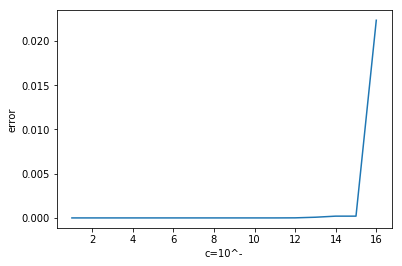

In [99]:
a=1
b=1
error_list = []
for i in range(-1,-18,-1):
    c = np.power(10.,i)
    x = quad_solve(a,b,c)
    print('c=10e%d' %(i),x,quad_error(a,b,c,x))
    error_list.append(quad_error(a,b,c,x))
plt.plot(np.arange(1,18,1),error_list)
plt.xlabel('c=10^-')
plt.ylabel('error')
plt.show()

c=10e-1 [Decimal('-0.1127016653792583114820734600'), Decimal('-0.887298334620741688517926540'), Decimal('-0.1127016653792583114820734600'), Decimal('-0.8872983346207416885179265401')] 3.5E-29
c=10e-2 [Decimal('-0.01010205144336438036054318505'), Decimal('-0.989897948556635619639456815'), Decimal('-0.01010205144336438036054318506'), Decimal('-0.9898979485566356196394568158')] 2.2725E-28
c=10e-3 [Decimal('-0.0010010020050140421324304349'), Decimal('-0.998998997994985957867569565'), Decimal('-0.001001002005014042132430434879'), Decimal('-0.9989989979949859578675695440')] 5.30525E-27
c=10e-4 [Decimal('-0.0001000100020005001400420132'), Decimal('-0.999899989997999499859957987'), Decimal('-0.0001000100020005001400420132043'), Decimal('-0.9998999899979994998599580297')] 1.07760725E-26
c=10e-5 [Decimal('-0.00001000010000200005000140005'), Decimal('-0.999989999899997999949998600'), Decimal('-0.00001000010000200005000140004200'), Decimal('-0.9999899998999979999499978001')] 1.9995200025E-25
c=10e

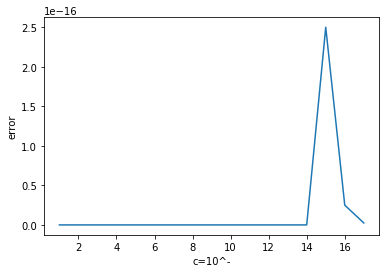

In [100]:
from decimal import Decimal
import decimal

def quad_solve2(a,b,c):
    b24ac = (b**2-4*a*c).sqrt()
    x_result = []
    x_result.append((-b+b24ac)/(2*a))
    x_result.append((-b-b24ac)/(2*a))
    x_result.append((-2*c)/(b+b24ac))
    x_result.append((-2*c)/(b-b24ac))
    return x_result

def quad_error2(a,b,c,x_result):
    total = Decimal(0.)
    for i in range(0,4):
        total += quad_equation(a,b,c,x_result[i]).copy_abs()
    return total/4

a2 = Decimal(1.)
b2 = Decimal(1.)
error_list = []
for i in range(-1,-18,-1):
    c = Decimal(10.) ** Decimal(i)
    x = quad_solve2(a,b,c)
    print('c=10e%d' %(i),x,quad_error2(a2,b2,c,x))
    error_list.append(quad_error2(a2,b2,c,x))
plt.plot(np.arange(1,18,1),error_list)
plt.xlabel('c=10^-')
plt.ylabel('error')
plt.show()